In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('datasets/lung_cancer_prediction_dataset.csv')
df.isnull().sum()

ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [6]:
df.drop(columns=['Cancer_Stage', 'Treatment_Type'], inplace=True)

In [3]:
df.isnull().mean() * 100

ID                              0.000000
Country                         0.000000
Population_Size                 0.000000
Age                             0.000000
Gender                          0.000000
Smoker                          0.000000
Years_of_Smoking                0.000000
Cigarettes_per_Day              0.000000
Passive_Smoker                  0.000000
Family_History                  0.000000
Lung_Cancer_Diagnosis           0.000000
Cancer_Stage                   95.938486
Survival_Years                  0.000000
Adenocarcinoma_Type             0.000000
Air_Pollution_Exposure          0.000000
Occupational_Exposure           0.000000
Indoor_Pollution                0.000000
Healthcare_Access               0.000000
Early_Detection                 0.000000
Treatment_Type                 96.979586
Developed_or_Developing         0.000000
Annual_Lung_Cancer_Deaths       0.000000
Lung_Cancer_Prevalence_Rate     0.000000
Mortality_Rate                  0.000000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  object 
 13 

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Yes,Low,Yes,No,Poor,No,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Yes,Low,Yes,No,Poor,No,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Yes,Medium,No,No,Poor,Yes,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Yes,Low,No,No,Poor,No,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Yes,Medium,Yes,No,Poor,No,Developing,15000,2.44,0.0


In [7]:
df.to_csv('datasets/cleaned-lung-cancer.csv')

In [11]:
df = pd.read_csv('datasets/cleaned-lung-cancer.csv')

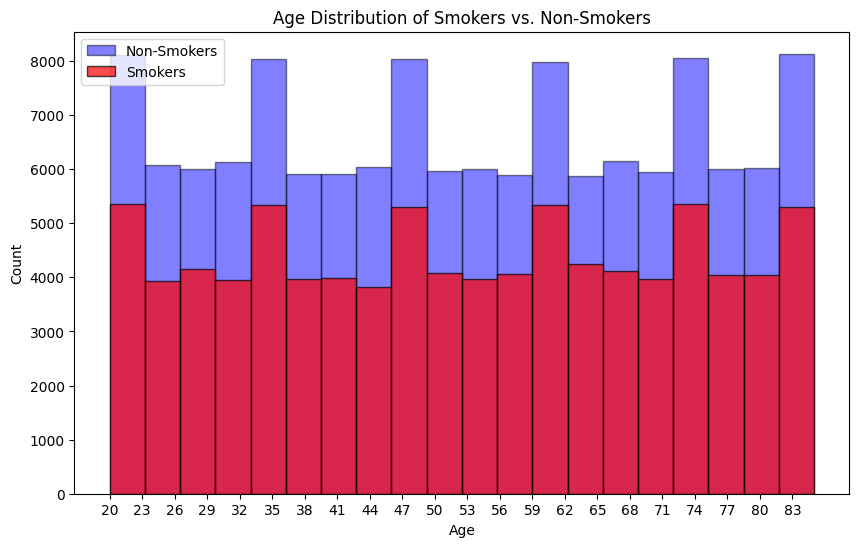

In [28]:
smokers = df[df["Smoker"] == "Yes"]["Age"]
non_smokers = df[df["Smoker"] == "No"]["Age"]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(non_smokers, bins=20, alpha=0.5, label="Non-Smokers", color="blue", edgecolor="black")
plt.hist(smokers, bins=20, alpha=0.7, label="Smokers", color="red", edgecolor="black")

plt.xticks(range(int(df["Age"].min()), int(df["Age"].max()) + 1, 3))  # Adjust step size as needed

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Smokers vs. Non-Smokers")
plt.legend()
plt.show()

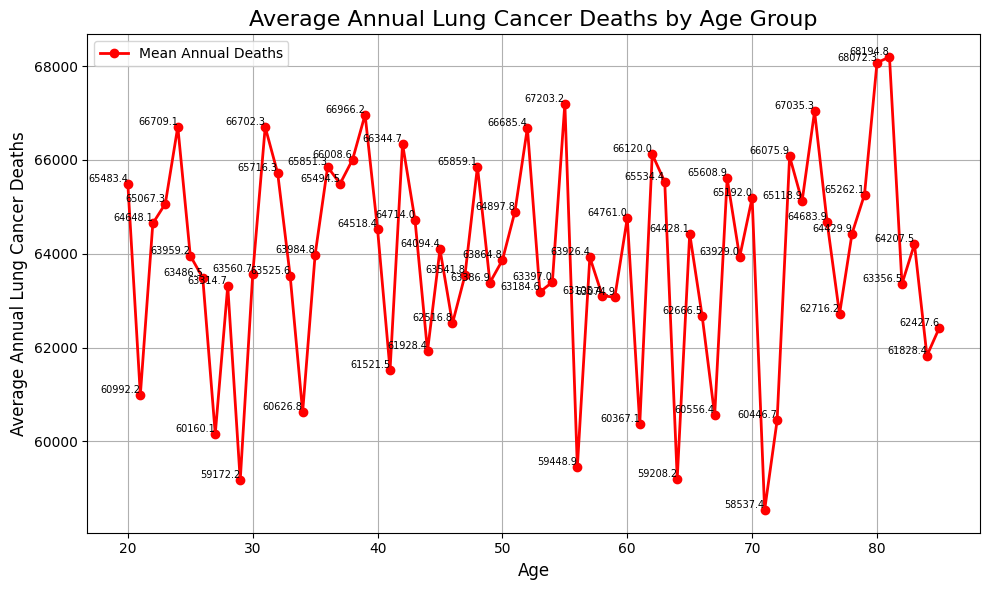

In [32]:
age_grouped = df.groupby('Age')['Annual_Lung_Cancer_Deaths'].mean()

plt.figure(figsize=(10, 6))
plt.plot(
    age_grouped.index, 
    age_grouped.values, 
    marker='o', 
    color='red', 
    linestyle='-', 
    linewidth=2, 
    label='Mean Annual Deaths'
)

for age, deaths in zip(age_grouped.index, age_grouped.values):
    plt.text(age, deaths, f'{deaths:.1f}', fontsize=7, ha='right', va='bottom', color='black')

plt.title('Average Annual Lung Cancer Deaths by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Annual Lung Cancer Deaths', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

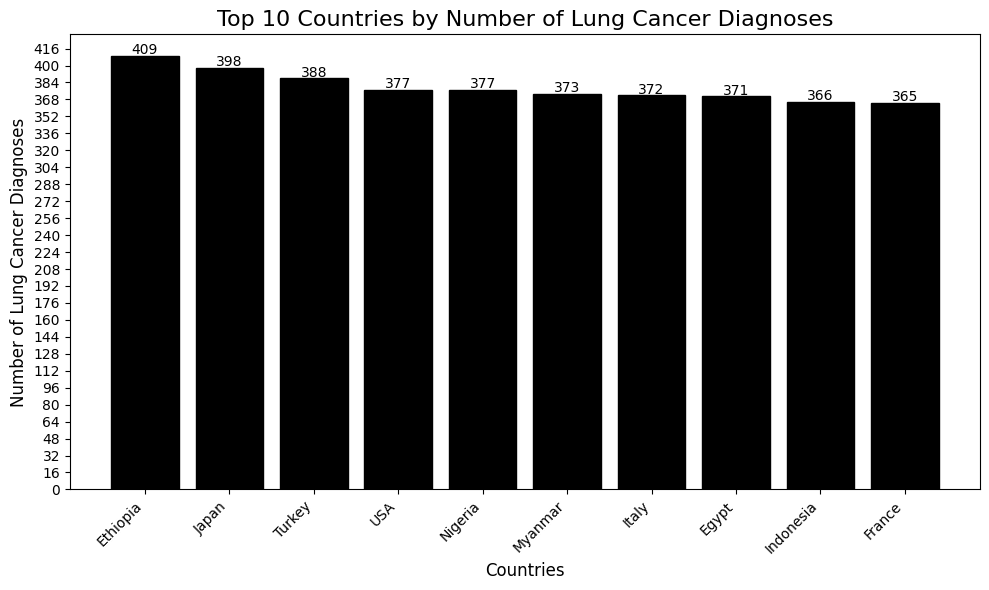

In [33]:
lung_cancer_counts = df[df['Lung_Cancer_Diagnosis'] == 'Yes']['Country'].value_counts()

sorted_countries = lung_cancer_counts.sort_values(ascending=False)

top_n = 10
top_countries = sorted_countries.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='black', edgecolor='black')

y_max = top_countries.max()
y_step = max(1, int(y_max / 25))  
plt.yticks(range(0, y_max + y_step, y_step), fontsize=10)

for i, value in enumerate(top_countries.values):
    plt.text(i, value + y_step * 0.1, str(value), ha='center', fontsize=10, color='black')

plt.title('Top 10 Countries by Number of Lung Cancer Diagnoses', fontsize=16)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Lung Cancer Diagnoses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

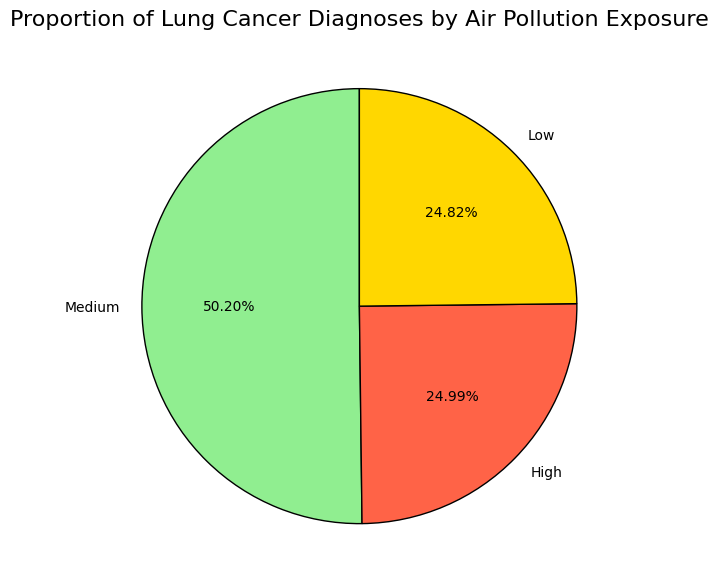

In [67]:
lung_cancer_cases = df[df['Lung_Cancer_Diagnosis'] == 'Yes']

pollution_exposure_counts = lung_cancer_cases['Air_Pollution_Exposure'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    pollution_exposure_counts.values, 
    labels=pollution_exposure_counts.index, 
    autopct='%1.2f%%',
    startangle=90,
    colors=['lightgreen', 'tomato', 'gold'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proportion of Lung Cancer Diagnoses by Air Pollution Exposure', fontsize=16)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   220632 non-null  int64  
 1   ID                           220632 non-null  int64  
 2   Country                      220632 non-null  object 
 3   Population_Size              220632 non-null  int64  
 4   Age                          220632 non-null  int64  
 5   Gender                       220632 non-null  object 
 6   Smoker                       220632 non-null  object 
 7   Years_of_Smoking             220632 non-null  int64  
 8   Cigarettes_per_Day           220632 non-null  int64  
 9   Passive_Smoker               220632 non-null  object 
 10  Family_History               220632 non-null  object 
 11  Lung_Cancer_Diagnosis        220632 non-null  object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [9]:
data = df.drop(columns=['Lung_Cancer_Diagnosis']) 
target = df['Lung_Cancer_Diagnosis'].map({'No': 0, 'Yes': 1}) 

In [37]:
df.shape[0]

220632

In [10]:
X = data[['Age', 'Smoker', 'Years_of_Smoking', 'Cigarettes_per_Day', 
          'Passive_Smoker', 'Air_Pollution_Exposure', 
          'Occupational_Exposure', 'Early_Detection', 'Developed_or_Developing',
          'Family_History', 'Indoor_Pollution', 'Healthcare_Access']].copy()
y = target

In [11]:
encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        encoders[column] = le

In [19]:
X.head()

,Age,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Air_Pollution_Exposure,Occupational_Exposure,Early_Detection,Developed_or_Developing,Family_History,Indoor_Pollution,Healthcare_Access
0,80,1,30,29,0,1,1,0,1,0,0,1
1,53,0,0,0,1,1,1,0,1,0,0,1
2,47,1,12,6,1,2,0,1,1,0,0,1
3,39,0,0,0,0,1,0,0,1,1,0,1
4,44,0,0,0,1,2,1,0,1,0,0,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [21]:
# Evaluation of Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg, zero_division = 0))

Logistic Regression Accuracy: 0.9593899426654883
Confusion Matrix:
 [[42335     0]
 [ 1792     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.00      0.00      0.00      1792

    accuracy                           0.96     44127
   macro avg       0.48      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [46]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [47]:
# Evaluation of KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9583928207220069
Confusion Matrix:
 [[42288    47]
 [ 1789     3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.06      0.00      0.00      1792

    accuracy                           0.96     44127
   macro avg       0.51      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [14]:
from sklearn.svm import SVC

In [15]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [16]:
# Evaluation of Supporting Vector Classfier
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc, zero_division = 0))

SVM Accuracy: 0.9593899426654883
Confusion Matrix:
 [[42335     0]
 [ 1792     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.00      0.00      0.00      1792

    accuracy                           0.96     44127
   macro avg       0.48      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Decision Tree
DC_model = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
DC_model.fit(X_train, y_train)
y_pred = DC_model.predict(X_test)

In [53]:
# Evaluation of Decision Tree
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division = 0)

In [54]:
print('Decision Tree Accuracy:', accuracy, '\n')
print('Classification report: \n', class_report, '\n')

Decision Tree Accuracy: 0.9284111768305119 

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     42335
           1       0.08      0.07      0.07      1792

    accuracy                           0.93     44127
   macro avg       0.52      0.52      0.52     44127
weighted avg       0.92      0.93      0.93     44127
 



In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Random Forest
RF_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
RF_model.fit(X_train, y_train)
y_pred_rf = RF_model.predict(X_test)

In [57]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=0)

In [65]:
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Classification Report: \n{class_report_rf}')

Random Forest Accuracy: 0.9576223174020441
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.07      0.00      0.01      1792

    accuracy                           0.96     44127
   macro avg       0.51      0.50      0.49     44127
weighted avg       0.92      0.96      0.94     44127



In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
# Naive Bayes
NB_model = GaussianNB()

In [15]:
# Naive Bayes Evluation
NB_model.fit(X_train, y_train)
y_pred_nb = NB_model.predict(X_test)

In [16]:
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred_nb)}')

Naive Bayes Accuracy: 0.9555147642033223
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     42335
           1       0.07      0.01      0.01      1792

    accuracy                           0.96     44127
   macro avg       0.51      0.50      0.50     44127
weighted avg       0.92      0.96      0.94     44127



In [2]:
import joblib

In [17]:
joblib.dump(svc_model, "best_model.pkl")

['best_model.pkl']

In [18]:
best_model = joblib.load("best_model.pkl")

In [20]:
fake_data = {
    "Name": "John Doe",
    "Age": 65,
    "Smoker": 1,  # 1 = Yes, 0 = No
    "Years_of_Smoking": 40,
    "Cigarettes_per_Day": 20,
    "Passive_Smoker": 1,
    "Air_Pollution_Exposure": 1,
    "Occupational_Exposure": 0,
    "Early_Detection": 0,
    "Developed_or_Developing": 1,  # 1 = Developed, 0 = Developing
    "Family_History": 1,  # 1 = Yes, 0 = No
    "Indoor_Pollution": 0,
    "Healthcare_Access": 1
}

fake_df = pd.DataFrame([fake_data])

In [25]:
prediction = best_model.predict(fake_df.drop(columns = ["Name"]).values)

if prediction[0] == 1:
    print("The model predicts the patient likely to have lung cancer (1).")
else:
    print("The model predicts the patient does NOT have lung cancer") 

The model predicts the patient does NOT have lung cancer
